# Crowdfunding Campaign Success Prediction
 ## Machine Learning Model Building Steps
  ### Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/crowdfunding_campaign.csv")

In [ ]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [ ]:
df.tail()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
99995,CID_99995,80417,112068.932642,26,870,Music,October,UK,AUD,6,No,84173,8,1
99996,CID_99996,85052,100430.502040,78,1146,Film,October,USA,USD,8,No,13913,42,1
99997,CID_99997,68407,102020.936312,87,636,Art,March,UK,EUR,2,Yes,45273,13,1
99998,CID_99998,59749,67026.111706,51,1276,Music,August,Australia,CAD,10,Yes,67574,29,1
99999,CID_99999,39913,54863.288105,73,695,Film,April,Germany,CAD,11,No,84806,41,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  object 
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  object 
 6   LaunchMonth          100000 non-null  object 
 7   Country              100000 non-null  object 
 8   Currency             100000 non-null  object 
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  object 
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.7+ MB


In [ ]:
df.isnull().sum()

,0
CampaignID,0
GoalAmount,0
RaisedAmount,0
DurationDays,0
NumBackers,0
Category,0
LaunchMonth,0
Country,0
Currency,0
OwnerExperience,0


In [ ]:
df.drop('CampaignID',axis =1,inplace = True)

In [ ]:
df.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [ ]:
Categorical_columns = df.select_dtypes('object').columns.tolist()

In [ ]:
Categorical_columns

['Category', 'LaunchMonth', 'Country', 'Currency', 'VideoIncluded']

In [ ]:
from  sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder ={col:LabelEncoder() for col in Categorical_columns}
for col in Categorical_columns:
  df[col]=label_encoder[col].fit_transform(df[col])

In [ ]:
df.corr()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
GoalAmount,1.000000,0.863471,-0.003708,0.005366,0.002413,-0.002721,-0.003059,-0.000346,0.003173,-0.005065,-0.005022,-0.002585,0.004240
RaisedAmount,0.863471,1.000000,-0.003111,0.003375,0.004033,-0.003567,-0.003502,0.002479,-0.000004,-0.004859,-0.002970,-0.001606,0.384000
DurationDays,-0.003708,-0.003111,1.000000,-0.002663,0.005711,0.001686,-0.000696,0.000240,0.000883,0.002717,0.004913,-0.003346,0.002787
NumBackers,0.005366,0.003375,-0.002663,1.000000,0.001975,-0.001569,-0.000936,0.000707,-0.000273,-0.001224,-0.001548,-0.004977,-0.002590
Category,0.002413,0.004033,0.005711,0.001975,1.000000,-0.001699,-0.001531,0.001834,-0.004937,0.001597,0.001054,0.000564,0.001984
LaunchMonth,-0.002721,-0.003567,0.001686,-0.001569,-0.001699,1.000000,0.000395,0.001839,-0.000477,-0.001695,0.005149,0.010426,-0.001153
Country,-0.003059,-0.003502,-0.000696,-0.000936,-0.001531,0.000395,1.000000,-0.002053,0.001610,0.001174,0.002493,-0.002024,-0.001269
Currency,-0.000346,0.002479,0.000240,0.000707,0.001834,0.001839,-0.002053,1.000000,0.000591,-0.003786,-0.000427,-0.002253,0.003088
OwnerExperience,0.003173,-0.000004,0.000883,-0.000273,-0.004937,-0.000477,0.001610,0.000591,1.000000,0.002316,0.001623,-0.002813,-0.007015
VideoIncluded,-0.005065,-0.004859,0.002717,-0.001224,0.001597,-0.001695,0.001174,-0.003786,0.002316,1.000000,-0.004740,-0.001769,0.002807


In [ ]:
X = df[['GoalAmount','RaisedAmount','DurationDays','NumBackers','Category','OwnerExperience','VideoIncluded','SocialMediaPresence','NumUpdates' ]]
y = df['IsSuccessful']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
numerical_columns = df.select_dtypes(include=['int64',float]).columns.to_list()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sclar = StandardScaler()
df[numerical_columns]=sclar.fit_transform(df[numerical_columns]).round(2)


In [ ]:
df.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,0.90,0.69,-1.71,1.57,-0.70,1.59,-1.42,0.70,0.26,1.0,-0.29,-1.49,-1.0
1,0.66,0.28,-0.14,-0.93,-1.41,1.30,-1.42,0.70,-0.43,1.0,1.01,1.63,-1.0
2,-1.11,-0.83,0.27,-1.49,-0.70,-0.72,1.41,-0.01,1.30,-1.0,-1.60,-1.07,1.0
3,-1.09,-0.79,-0.60,-0.39,-0.70,1.30,-0.00,-1.42,0.09,-1.0,-0.97,0.73,1.0
4,-0.83,-0.98,0.74,1.08,0.00,1.59,-1.42,-1.42,0.44,1.0,0.78,-0.52,-1.0


### Random Forest - Model Building and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=60,max_depth=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=60, random_state=10)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Accuracy = accuracy_score(y_test,y_pred)
print('Random Forest Accuracy:', Accuracy)

Random Forest Accuracy: 0.7364


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

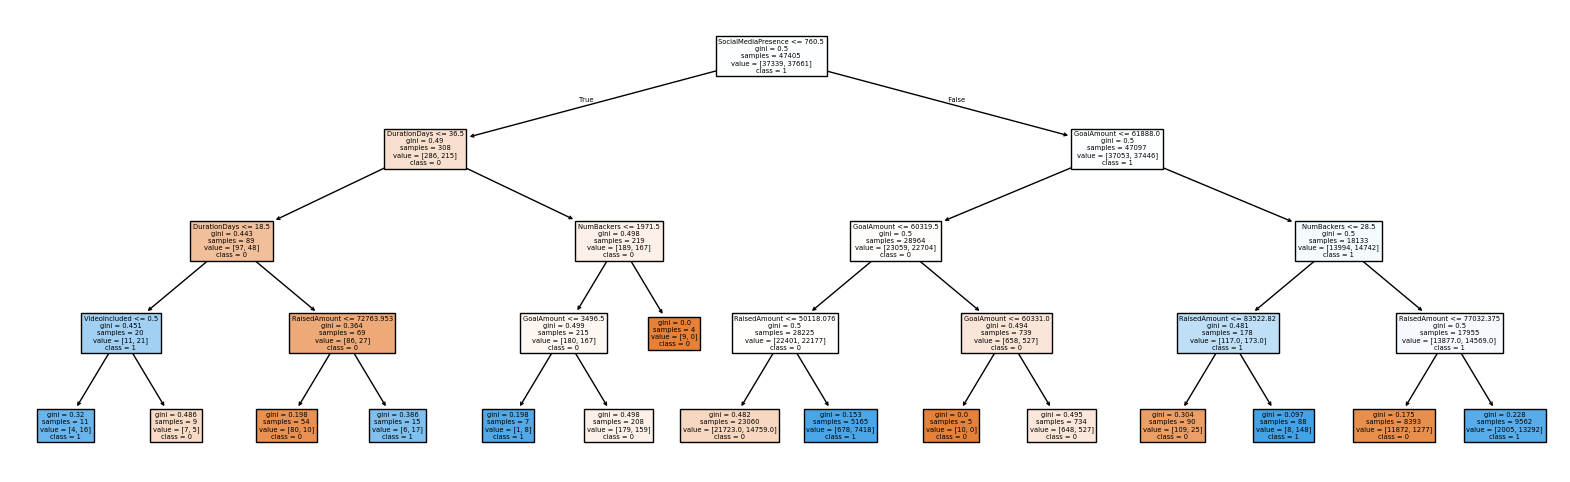

In [ ]:
plt.figure(figsize=(20,6))
plot_tree(rf.estimators_[4], feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

## Naive Bayes - Model Building and Evaluation

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy_nb = nb_model.score(x_test, y_test)
print('Naive Bayes Accuracy:', accuracy_nb)

Naive Bayes Accuracy: 0.65904


## Support Vector Machine (SVM) - Model Building and Evaluation

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
accuracy_svm = svm_model.score(x_test, y_test)
print('SVM Accuracy:', accuracy_svm)

SVM Accuracy: 0.9936


### Comparison and Analysis

Compare the accuracy scores of the three models

 RANDOM FOREST -0.73

 NAVIE BAYES -0.65

 SVM -0.99

Discuss which model performed best and why, based on the accuracy scores and other relevant factors?

   SUPPORT VECTOR MACHINE GIVE EXACT ACCURACY 0.99

Reflect on the strengths and weaknesses of each model in the context of this dataset?

RANDOM FOREST
 overfitting and handles missing values well due to ensemble learning

 slow to predict with large datasets due to the complexity of multiple trees

 NAVIE BAYES
 Fast and efficient, particularly with high-dimensional data

 Assumes independence between features, which may not hold true

 SVM (Support Vector Machine)
 Effective in high-dimensional spaces and robust to outliers by maximizing the margin

 Computationally intensive and may require careful tuning of parameters for optimal performance,